# Step 1 : Load and Explore Dataset

## Import the necsessary libraries

In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


## Load the IRIS dataset

In [2]:
iris_data = datasets.load_iris()

In [3]:
iris_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

## Split the dataset into features(X) and target labels(y)

In [4]:
#Already splitted and label encode with 0 ,1 ,2
# PLACE THE IRIS DATA IN A PANDAS DATAFRAME
X = pd.DataFrame(data=iris_data.data, 
                  columns=iris_data.feature_names)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
# Here species 0 means setosa
#              1 means versicolor
#              2 means virginica 
y = pd.DataFrame(data=iris_data.target, 
                  columns=['Species'])
y.head()

,Species
0,0
1,0
2,0
3,0
4,0


## Perfrom Data Preprocessing such Scaling features

In [6]:
#check missing data
X.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [7]:
y.isnull().sum()

Species    0
dtype: int64

In [8]:
# Scale the numerical features
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [9]:
y = y.to_numpy()
y= y.ravel()

# Step 2 : Train Supervised Models

## Split the data into training and test set

In [10]:
# Train Test split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=0)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(120, 4) (30, 4) (120,) (30,)


## Choose and Train Supervised Learning Models

### Logistic Regression Model

In [11]:
type(X_train)

numpy.ndarray

In [12]:
type(y_train)

numpy.ndarray

In [13]:
lgr = LogisticRegression(random_state = 0)
lgr.fit(X_train, y_train)

LogisticRegression(random_state=0)

### Random Forest Classifier

In [14]:
rfc = RandomForestClassifier(random_state = 0)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

### Decision Tree Classifier

In [15]:
dtc = DecisionTreeClassifier(random_state = 0)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

## Evaluate Using Confusion Matrix, Accuracy of each Classification Model

### Evaluate Logistic Regression Model on train and test set

In [16]:
#Predict label data by using model
lgr_y_train_pred = lgr.predict(X_train)
lgr_y_test_pred = lgr.predict(X_test)

In [18]:
# Confusion Matrix and Accuracy Score
print("Training Confusion matrix is\n {}  \nTest Confusion matrix is \n{}".format(confusion_matrix(y_train, lgr_y_train_pred),confusion_matrix(y_test, lgr_y_test_pred)))

print('training score: %.3f, test score: %.3f' % (accuracy_score(y_train, lgr_y_train_pred), accuracy_score(y_test, lgr_y_test_pred)))
print('precision triaining score: %.3f, precision test score: %.3f' % (precision_score(y_train, lgr_y_train_pred,average='macro'), precision_score(y_test, lgr_y_test_pred,average='macro')))
print('recall training score: %.3f,recall test score: %.3f' % (recall_score(y_train, lgr_y_train_pred,average='macro'), recall_score(y_test, lgr_y_test_pred,average='macro')))

Training Confusion matrix is
 [[39  0  0]
 [ 0 34  3]
 [ 0  2 42]]  
Test Confusion matrix is 
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
training score: 0.958, test score: 1.000
precision triaining score: 0.959, precision test score: 1.000
recall training score: 0.958,recall test score: 1.000


### Evaluate Random Forest Classifier on train and test set

In [20]:
#Predict label data by using model
rfc_y_train_pred = rfc.predict(X_train)
rfc_y_test_pred = rfc.predict(X_test)

In [21]:
# Confusion Matrix and Accuracy Score
print("Training Confusion matrix is\n {}  \nTest Confusion matrix is \n{}".format(confusion_matrix(y_train, rfc_y_train_pred),confusion_matrix(y_test, rfc_y_test_pred)))

print('training score: %.3f, test score: %.3f' % (accuracy_score(y_train, rfc_y_train_pred), accuracy_score(y_test, rfc_y_test_pred)))

print('precision triaining score: %.3f, precision test score: %.3f' % (precision_score(y_train, rfc_y_train_pred,average='macro'), precision_score(y_test, rfc_y_test_pred,average='macro')))
print('recall training score: %.3f,recall test score: %.3f' % (recall_score(y_train, rfc_y_train_pred,average='macro'), recall_score(y_test, rfc_y_test_pred,average='macro')))

Training Confusion matrix is
 [[39  0  0]
 [ 0 37  0]
 [ 0  0 44]]  
Test Confusion matrix is 
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
training score: 1.000, test score: 1.000
precision triaining score: 1.000, precision test score: 1.000
recall training score: 1.000,recall test score: 1.000


### Evaluate Decison Tree Classifier on train and test set

In [22]:
#Predict label data by using model
dtc_y_train_pred = dtc.predict(X_train)
dtc_y_test_pred = dtc.predict(X_test)

In [23]:
# Confusion Matrix and Accuracy Score
print("Training Confusion matrix is\n {}  \nTest Confusion matrix is \n{}".format(confusion_matrix(y_train, dtc_y_train_pred),confusion_matrix(y_test, dtc_y_test_pred)))

print('training score: %.3f, test score: %.3f' % (accuracy_score(y_train, dtc_y_train_pred), accuracy_score(y_test, dtc_y_test_pred)))
print('precision triaining score: %.3f, precision test score: %.3f' % (precision_score(y_train, dtc_y_train_pred,average='macro'), precision_score(y_test, dtc_y_test_pred,average='macro')))
print('recall training score: %.3f,recall test score: %.3f' % (recall_score(y_train, dtc_y_train_pred,average='macro'), recall_score(y_test, dtc_y_test_pred,average='macro')))

Training Confusion matrix is
 [[39  0  0]
 [ 0 37  0]
 [ 0  0 44]]  
Test Confusion matrix is 
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
training score: 1.000, test score: 1.000
precision triaining score: 1.000, precision test score: 1.000
recall training score: 1.000,recall test score: 1.000


### Conclusion : We see from the above that Random forest and Decision tree Calssifier gives 100% accuracy on both training and test set. Therefore they are the best models for this data set

# Step 3 : Check for Overfitting  

## Monitors for signs of Overfitting

### Since we see above models have pretty good accuracy on training as well as test set.so, there is no sign of overfitting.

## Apply Cross Validation or Hyper Parameter Tuning

In [22]:
def cv_acc(model):
    rmse = cross_val_score(model, X_scaled,y, scoring="accuracy", cv=5)
    return (rmse)

baseline_models =['Logistic_Reg','Random_Forest_Clas.','Decision_Tree_Clas.']
cv_score=[]

#Logistic Regression
score_lgr = cv_acc(lgr)
cv_score.append(score_lgr.mean())

#Random Forest Classifier
score_rfc = cv_acc(rfc)
cv_score.append(score_rfc.mean())


#Decision Tree Classifier
score_dtc = cv_acc(dtc)
cv_score.append(score_dtc.mean())

final_cv_score = pd.DataFrame(baseline_models, columns = ['Classifier'])
final_cv_score['Accuracy_mean'] = cv_score
final_cv_score

,Classifier,Accuracy_mean
0,Logistic_Reg,0.960000
1,Random_Forest_Clas.,0.966667
2,Decision_Tree_Clas.,0.960000


### Conclusion :  we see that overall Random Forest is best 

## Hyper Parameters

In [23]:
# Preforming a Random Grid Search to find the best combination of parameters
parameters = {
    "n_estimators":[20,50,70,100],
    "max_depth":[1,3,5,7,9],
}
rfc_model= RandomForestClassifier(random_state = 0)
search = RandomizedSearchCV(rfc_model,parameters)
result = search.fit(X_train,y_train)
result.best_params_


{'n_estimators': 20, 'max_depth': 5}

## Final Evaluation

In [24]:
rfc = RandomForestClassifier(random_state = 0,n_estimators=20, max_depth= 1)
rfc.fit(X_train, y_train)
rfc_y_train_pred = rfc.predict(X_train)
rfc_y_test_pred = rfc.predict(X_test)

In [25]:
# Confusion Matrix and Accuracy Score
print("Training Confusion matrix is\n {}  \nTest Confusion matrix is \n{}".format(confusion_matrix(y_train, rfc_y_train_pred),confusion_matrix(y_test, rfc_y_test_pred)))

print('training score: %.3f, test score: %.3f' % (accuracy_score(y_train, rfc_y_train_pred), accuracy_score(y_test, rfc_y_test_pred)))

Training Confusion matrix is
 [[39  0  0]
 [ 0 23 14]
 [ 0  1 43]]  
Test Confusion matrix is 
[[11  0  0]
 [ 0  5  8]
 [ 0  0  6]]
training score: 0.875, test score: 0.733


### Conclusion : we see Hyper parameter choice is not optimal so we use default parameters in this dataset

# Step 4 : Apply Unsupervised Model

## Apply Kmeans Clustering Modeland Evaluate Model

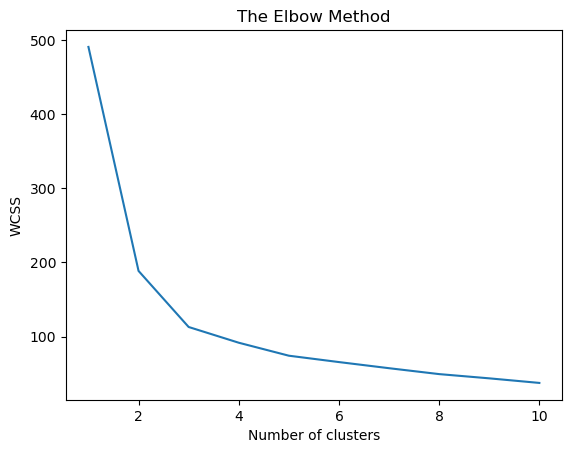

In [26]:
#Find optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',n_init=10, random_state = 42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### we see 3 clusters is the best choice

### Train Model

In [27]:
# Apply K-means clustering
k = 3 # Set the chosen number of clusters
kmeans = KMeans(n_clusters=k, n_init=10,random_state=42)
kmeans.fit(X_scaled)
y_kmeans = kmeans.predict(X_scaled)
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0
 0 2 2 2 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 2 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


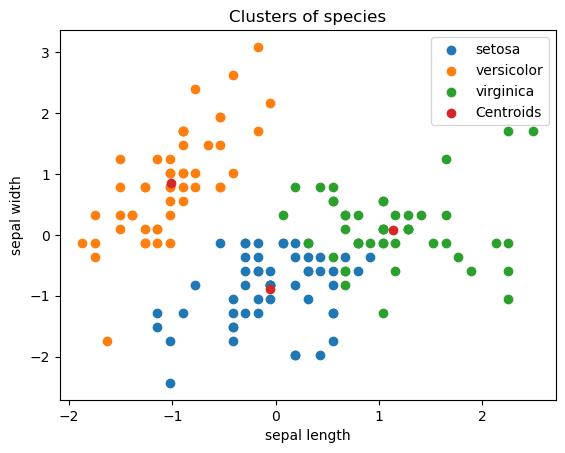

In [28]:
plt.scatter(X_scaled[y_kmeans == 0, 0],X_scaled[y_kmeans == 0, 1],  label = 'setosa')
plt.scatter(X_scaled[y_kmeans == 1, 0],X_scaled[y_kmeans == 1, 1],  label = 'versicolor')
plt.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1],  label = 'virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],label = 'Centroids')
plt.title('Clusters of species')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()